<a href="https://colab.research.google.com/github/HRJ369/SOS-2024/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:

%%capture
import pandas as pd
import numpy as np

# for normalization
from sklearn import preprocessing

# for visualization
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# for Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# for data imbalance, SMOTE
from imblearn.over_sampling import SMOTE
from scipy import stats

# to calculate the performance of the models
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [73]:
import sys
!time pip install rdkit-pypi


real	0m9.048s
user	0m7.588s
sys	0m0.181s


In [74]:
try:
  from rdkit import Chem
  from rdkit.Chem import Draw
  from rdkit.Chem.Draw import IPythonConsole
except ImportError:
  print('Stopping RUNTIME. Colaboratory will restart automatically. Please run again.')
  exit()

In [75]:
# load the training data and save it in the variable "train"
train = pd.read_csv('https://raw.githubusercontent.com/Iris-Agape/WiDS_23/main/Data_practice/train.csv', index_col=0)

# load the test data and save it in the variable "test"
test = pd.read_csv('https://raw.githubusercontent.com/Iris-Agape/WiDS_23/main/Data_practice/test.csv', index_col=0)

In [76]:
train.iloc[0,:]

SMILES                 COC1OCCO1
name      2-methoxy-13-dioxolane
label                          0
500                     0.000051
502                     0.000051
                   ...          
3992                    0.000004
3994                    0.000004
3996                    0.000004
3998                    0.000004
4000                    0.000004
Name: 0, Length: 1754, dtype: object

In [77]:
train

,SMILES,name,label,500,502,504,506,508,510,512,...,3982,3984,3986,3988,3990,3992,3994,3996,3998,4000
0,COC1OCCO1,2-methoxy-13-dioxolane,0,0.000051,0.000051,0.000052,0.000052,0.000053,0.000053,0.000054,...,0.000005,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004
1,CCCCCC=O,hexanal,1,0.000121,0.000126,0.000131,0.000136,0.000141,0.000146,0.000151,...,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008
2,CC1CCC(C)C1C,1R2R3S-123-trimethylcyclopentane,0,0.000013,0.000013,0.000013,0.000013,0.000012,0.000012,0.000012,...,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013
3,c1cn[se]c1,12-selenazole,0,0.000243,0.000244,0.000245,0.000246,0.000248,0.000249,0.000251,...,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003
4,CCC(C)=CC(C)C,3E-24-dimethylhex-3-ene,0,0.000053,0.000053,0.000053,0.000054,0.000054,0.000054,0.000054,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012
5,[O]C(=O)C1=CC(=O)C(C([O])=O)=CC1=O,25-dicarboxy-14-benzoquinon-diate,1,0.000121,0.000125,0.000130,0.000134,0.000139,0.000143,0.000148,...,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
6,Clc1ccc(-c2ccc(Cl)cc2)cc1,44--dichloro-biphenyl,0,0.000394,0.000401,0.000409,0.000415,0.000421,0.000427,0.000431,...,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
7,CCN(CC)C(C)=O,NN-diethylacetamide,1,0.000079,0.000079,0.000078,0.000078,0.000077,0.000077,0.000076,...,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005
8,CCNc1ccccc1,N-ethylaniline,0,0.000337,0.000328,0.000321,0.000313,0.000307,0.000300,0.000294,...,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006
9,C=C=COC,3-methoxy-12-propadiene,0,0.000035,0.000036,0.000036,0.000036,0.000037,0.000037,0.000038,...,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004


In [78]:
# change the index values below to pick molecules with and without a carbonyl
idx_hasCarbonyl=1
idx_notCarbonyl=0
# get the data for the two molecules
hasCarbonyl=train.set_index('name').iloc[idx_hasCarbonyl,3:]
notCarbonyl=train.set_index('name').iloc[idx_notCarbonyl,3:]
# plot the spectra
fig = go.Figure()
fig.add_trace(go.Scatter(x=hasCarbonyl.index, y=hasCarbonyl, name=hasCarbonyl.name,mode='markers'))
fig.add_trace(go.Scatter(x=notCarbonyl.index, y=notCarbonyl,name=notCarbonyl.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)


In [79]:
# define a function to perform min-max normalization
def df_normalize(df,i=3):
  """
  apply min-max_scaler to each rows
  since min-max scaler originally applies to columns,
  we will use transposed data and then update the data with transposed result
  """
  min_max_scaler = preprocessing.MinMaxScaler()
  df.iloc[:,i:] = min_max_scaler.fit_transform(df.iloc[:,i:].T).T


In [80]:
# change the index values below to pick molecules with and without a carbonyl
idx_hasCarbonyl=1
idx_notCarbonyl=0
# get the data for the two molecules
hasCarbonyl=train.set_index('name').iloc[idx_hasCarbonyl,3:]
notCarbonyl=train.set_index('name').iloc[idx_notCarbonyl,3:]
# plot the spectra
fig = go.Figure()
fig.add_trace(go.Scatter(x=hasCarbonyl.index, y=hasCarbonyl, name=hasCarbonyl.name,mode='markers'))
fig.add_trace(go.Scatter(x=notCarbonyl.index, y=notCarbonyl,name=notCarbonyl.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)


In [81]:
threshold=0.2
# define a function to apply the threshold chosen above
def applyThreshold (dataframe,i=3):
  """
  i is the position of the start of the attributes
  """
  dataframe.iloc[:,i:]=np.where((dataframe.iloc[:,i:]< threshold),0,dataframe.iloc[:,i:])

# use the function to apply the threshold to the training and test data
applyThreshold(train)
applyThreshold(test)



In [82]:
# change the index values below to pick molecules with and without a carbonyl
idx_hasCarbonyl=1
idx_notCarbonyl=0
# get the data for the two molecules
hasCarbonyl=train.set_index('name').iloc[idx_hasCarbonyl,3:] # picked
notCarbonyl=train.set_index('name').iloc[idx_notCarbonyl,3:] # picked
# plot the spectra
fig = go.Figure()
fig.add_trace(go.Scatter(x=hasCarbonyl.index, y=hasCarbonyl, name=hasCarbonyl.name,mode='markers'))
fig.add_trace(go.Scatter(x=notCarbonyl.index, y=notCarbonyl,name=notCarbonyl.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)

In [83]:
# define a function to split the column containing the label from the columns containing the attributes
def splitXY(dataframe,start_X=3,end_X=None,start_Y=2,end_Y=3):
  X=dataframe.iloc[:,start_X:end_X]
  # since current X is a dataframe structure, we use ".value" to only get values
  X=X.values
  Y=dataframe.iloc[:,start_Y:end_Y]
  # since current Y is a dataframe structure, we use ".value" to only get values
  Y=Y.values.ravel()
  # this makes sure all the labels are integers
  Y=Y.astype(float).astype(int)
  return X,Y


# now apply the function to the normalized and thresholded train and test data
X,Y=splitXY(train)
X_test,Y_test=splitXY(test)

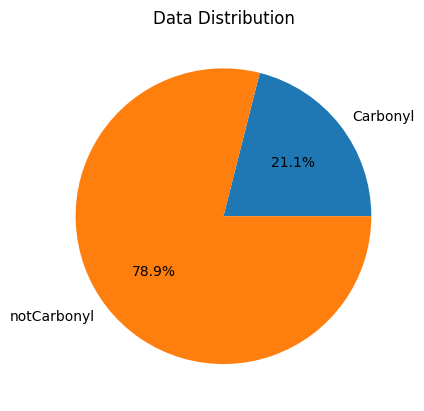

In [84]:
# get the total number of molecules in the training data
total=len(Y)
# determine how many contain a carbonyl
label1=Y.sum()
# find the number without a carbonyl by subtraction
label0=total-label1
# plot the data
data=[label1,label0]
my_labels = 'Carbonyl','notCarbonyl'
plt.pie(data,labels=my_labels,autopct='%1.1f%%')
plt.title('Data Distribution')
plt.show()


In [91]:
%%capture
# define SMOTE method, reducing the number of neighbors
sm = SMOTE(sampling_strategy='minority', k_neighbors=3) # reduce k_neighbors
# apply SMOTE to the training data
X, Y= sm.fit_resample(X,Y)


# again determine the number of molecules with and without carbonyl groups and visualize
total=len(Y)
label1=Y.sum()
label0=total-label1
data=[label1,label0]
my_labels = 'Carbonyl','notCarbonyl'
plt.pie(data,labels=my_labels,autopct='%1.1f%%')
plt.title('Data Distribution')
plt.show()

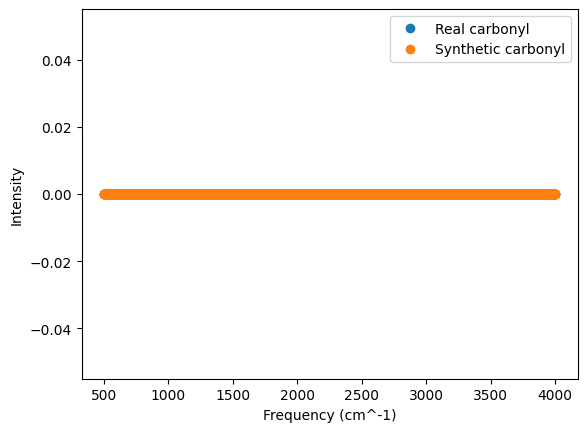

In [92]:
# index values of a real and synthetic carbonyl (you can change these values to see other spectra)
idx_realCarbonyl=1 # this selects the molecule in row 1 of the training data (hexanal)
idx_synCarbonyl=len(train)-1 # this selects the first synthetic carbonyl spectrum, remember Python uses zero-based indexing
# get the data for the two molecules
spectrum_realCarbonyl=X[idx_realCarbonyl,:]
spectrum_synCarbonyl=X[idx_synCarbonyl,:]
# get the frequencies for plotting
frequencies=range(500,4002,2)
# generate the plot
plt.plot(frequencies,spectrum_realCarbonyl,"o",label="Real carbonyl")
plt.plot(frequencies,spectrum_synCarbonyl,"o",label="Synthetic carbonyl")
plt.legend(loc="upper right")
plt.xlabel("Frequency (cm^-1)")
plt.ylabel("Intensity")
plt.show()

In [ ]:
!pip show imbalanced_learn
